In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Dataset

In [14]:
df = pd.read_csv('medicalmalpractice.csv')
df.head()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female


## About Dataset

In [8]:
df.describe()

,Amount,Severity,Age,Private Attorney,Marital Status
count,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000
mean,157484.554816,4.799659,42.701868,0.660889,1.889559
std,193135.093293,2.083439,19.811063,0.473411,1.002502
min,1576.000000,1.000000,0.000000,0.000000,0.000000
25%,43670.250000,3.000000,28.000000,0.000000,1.000000
50%,98131.000000,4.000000,43.000000,1.000000,2.000000
75%,154675.250000,7.000000,58.000000,1.000000,2.000000
max,926411.000000,9.000000,87.000000,1.000000,4.000000


In [9]:
df.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

## Removing the rows having Null values
- In our case we don't have any null

In [15]:
df.dropna(inplace=True)


## Analysing the data

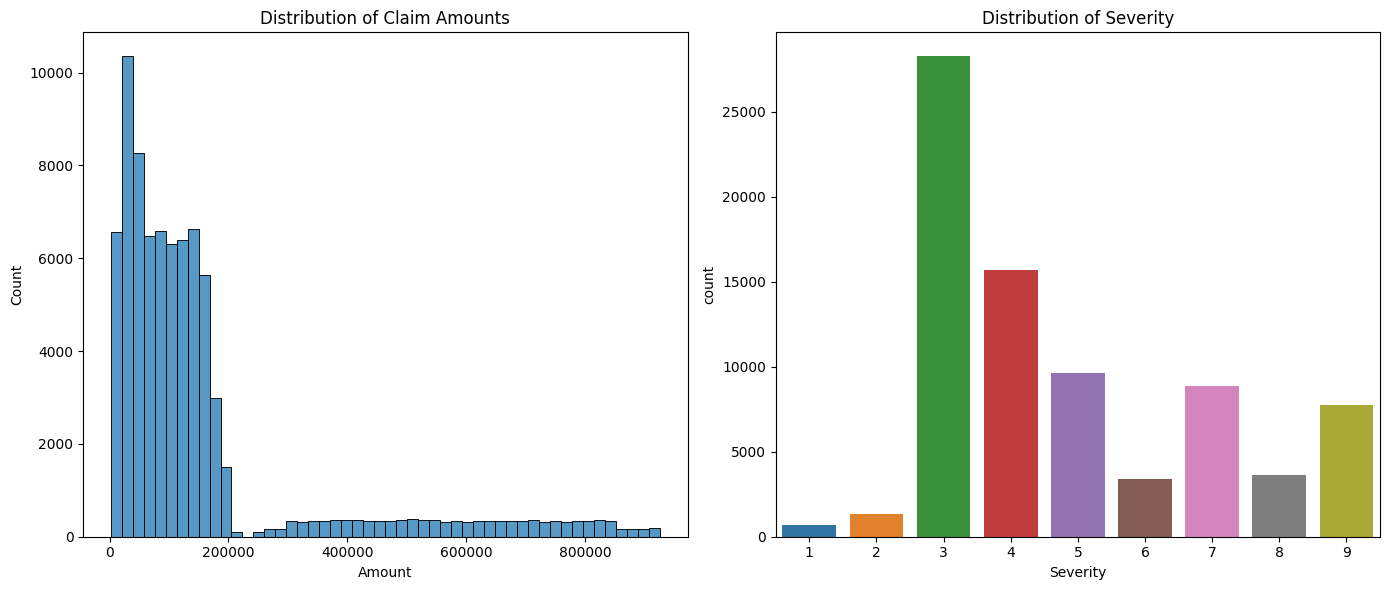

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Amount'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of Claim Amounts')

sns.countplot(x='Severity', data=df, ax=axes[1])
axes[1].set_title('Distribution of Severity')

plt.tight_layout()
plt.show()


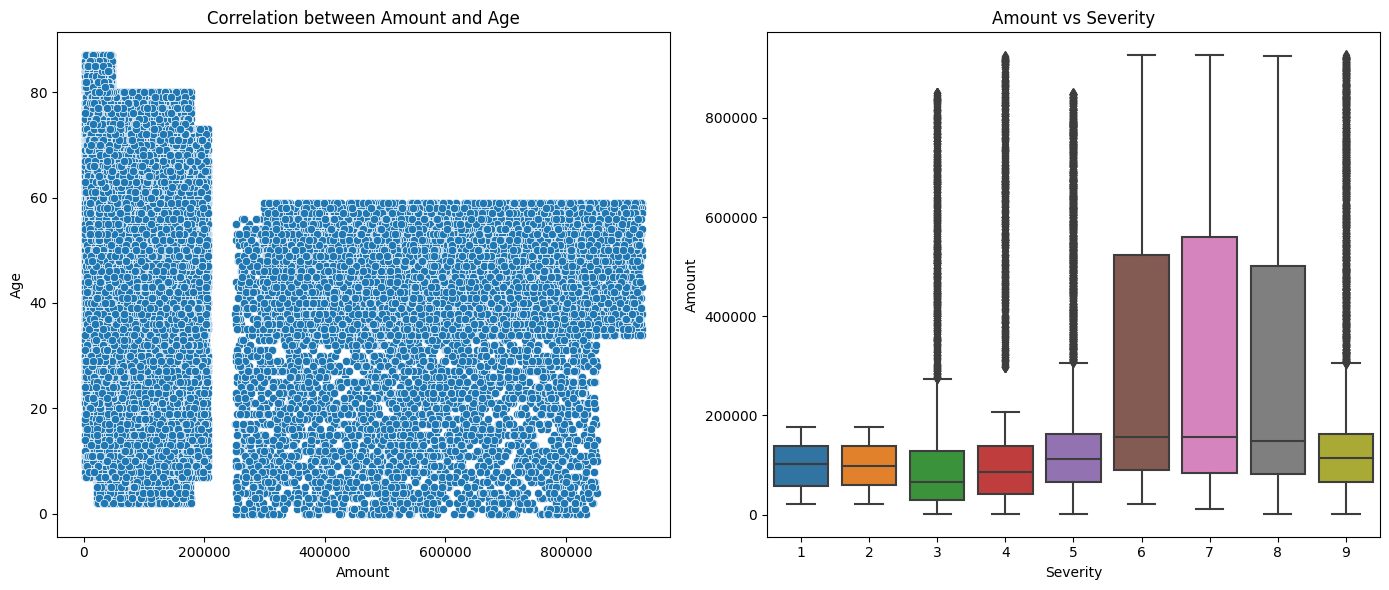

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Correlation between Amount and Age
sns.scatterplot(x='Amount', y='Age', data=df, ax=axes[0])
axes[0].set_title('Correlation between Amount and Age')

# Amount vs Severity
sns.boxplot(x='Severity', y='Amount', data=df, ax=axes[1])
axes[1].set_title('Amount vs Severity')

plt.tight_layout()
plt.show()


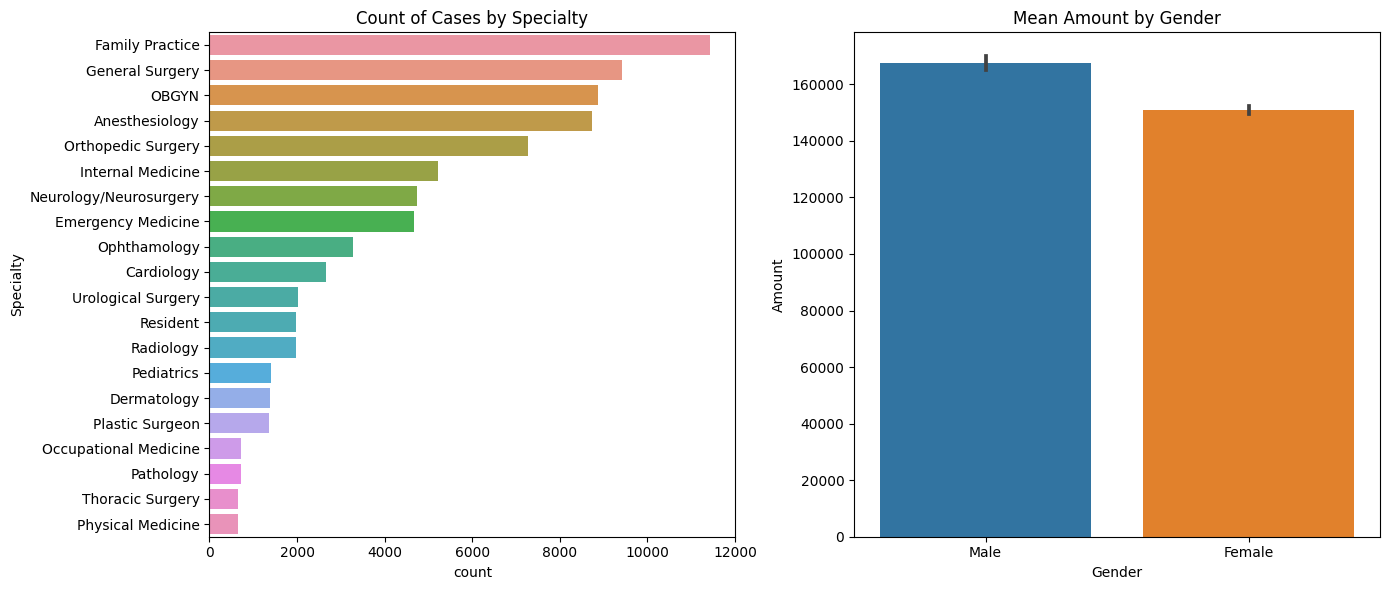

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count of cases by Specialty
sns.countplot(y='Specialty', data=df, order=df['Specialty'].value_counts().index, ax=axes[0])
axes[0].set_title('Count of Cases by Specialty')

# Mean Amount by Gender
sns.barplot(x='Gender', y='Amount', data=df, estimator=np.mean, ax=axes[1])
axes[1].set_title('Mean Amount by Gender')

plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_6360\90363341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


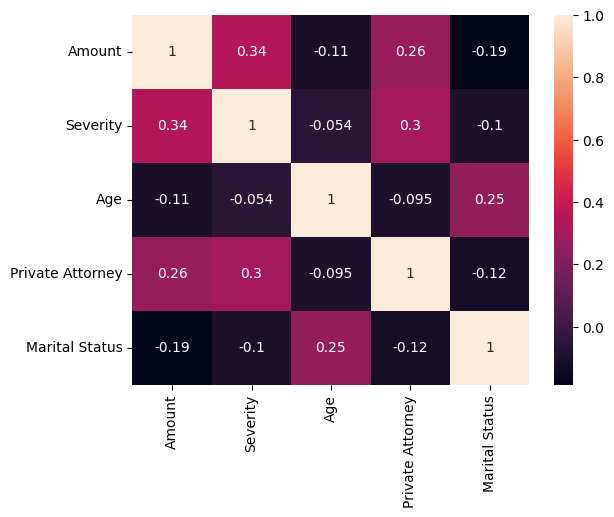

In [22]:
# Pearson correlation for numerical variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

# Chi-Square test for categorical variables
contingency_table = pd.crosstab(df['Severity'], df['Gender'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
